In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [3]:
df=pd.read_csv(r'C:\Users\Sneha Lalwani\Downloads\spam.csv')

In [4]:
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
X=df['EmailText'].values
y=df['Label'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [11]:
cv=CountVectorizer()
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [12]:
print(X_train)

  (0, 4784)	1
  (0, 3645)	1
  (0, 6799)	1
  (0, 5883)	1
  (0, 1416)	1
  (0, 6468)	1
  (0, 3424)	1
  (0, 1106)	1
  (0, 4657)	1
  (0, 4559)	1
  (0, 1762)	1
  (0, 4400)	1
  (0, 4999)	1
  (0, 4923)	1
  (0, 7691)	1
  (0, 3315)	1
  (0, 4672)	1
  (1, 1219)	1
  (1, 4880)	1
  (1, 3244)	1
  (1, 3758)	1
  (1, 6507)	1
  (1, 1583)	1
  (1, 2748)	1
  (1, 5189)	1
  :	:
  (4452, 1837)	1
  (4452, 1632)	1
  (4452, 3540)	1
  (4452, 3517)	1
  (4453, 1612)	1
  (4453, 4156)	1
  (4453, 4027)	1
  (4453, 6312)	1
  (4454, 3391)	1
  (4454, 5346)	1
  (4454, 6319)	1
  (4454, 5601)	1
  (4454, 3035)	1
  (4454, 6318)	1
  (4455, 3849)	1
  (4455, 4838)	1
  (4455, 6014)	1
  (4455, 6935)	1
  (4456, 3645)	2
  (4456, 4834)	1
  (4456, 3189)	1
  (4456, 3368)	1
  (4456, 7575)	1
  (4456, 2843)	1
  (4456, 4474)	1


In [13]:
print(X_test)

  (0, 1812)	1
  (0, 2766)	1
  (0, 3074)	1
  (0, 3344)	1
  (0, 3575)	1
  (0, 3881)	1
  (0, 4696)	1
  (0, 4784)	1
  (0, 4787)	1
  (0, 7053)	1
  (0, 7499)	1
  (1, 924)	1
  (1, 956)	1
  (1, 1037)	1
  (1, 1991)	1
  (1, 2027)	1
  (1, 2380)	2
  (1, 2738)	1
  (1, 2843)	1
  (1, 2961)	1
  (1, 3305)	1
  (1, 3423)	1
  (1, 3608)	1
  (1, 3747)	1
  (1, 3845)	1
  :	:
  (1111, 7165)	1
  (1111, 7401)	1
  (1111, 7440)	1
  (1112, 3368)	1
  (1112, 4505)	1
  (1112, 4625)	1
  (1112, 6264)	2
  (1112, 6776)	1
  (1112, 6794)	1
  (1112, 7492)	1
  (1112, 7679)	1
  (1112, 7696)	1
  (1113, 2429)	1
  (1113, 3136)	1
  (1113, 3424)	1
  (1113, 6799)	1
  (1114, 305)	1
  (1114, 1293)	1
  (1114, 1354)	1
  (1114, 1455)	1
  (1114, 3368)	1
  (1114, 4245)	1
  (1114, 4734)	1
  (1114, 5258)	1
  (1114, 7696)	1


In [14]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=42)
classifier.fit(X_train,y_train)
print(classifier.score(X_test,y_test))

0.979372197309417


In [15]:
y_pred=classifier.predict(X_test)

In [19]:
y_test=cv.transform(y_test)

In [20]:
print(classifier.score(y_test,y_pred))

0.8860986547085202


In [21]:
import seaborn as sns

C:\Users\Sneha Lalwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

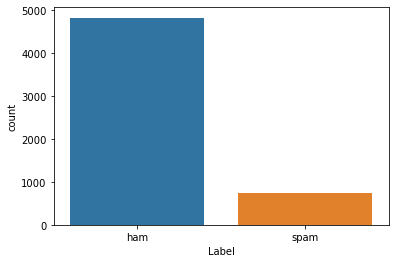

In [22]:
sns.countplot(df['Label'])